In [1]:
from struktury_danych import *
from fast_map_import import *
from solution import *
from wczytanie_mapy import *

d:\Anaconda\envs\BO\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


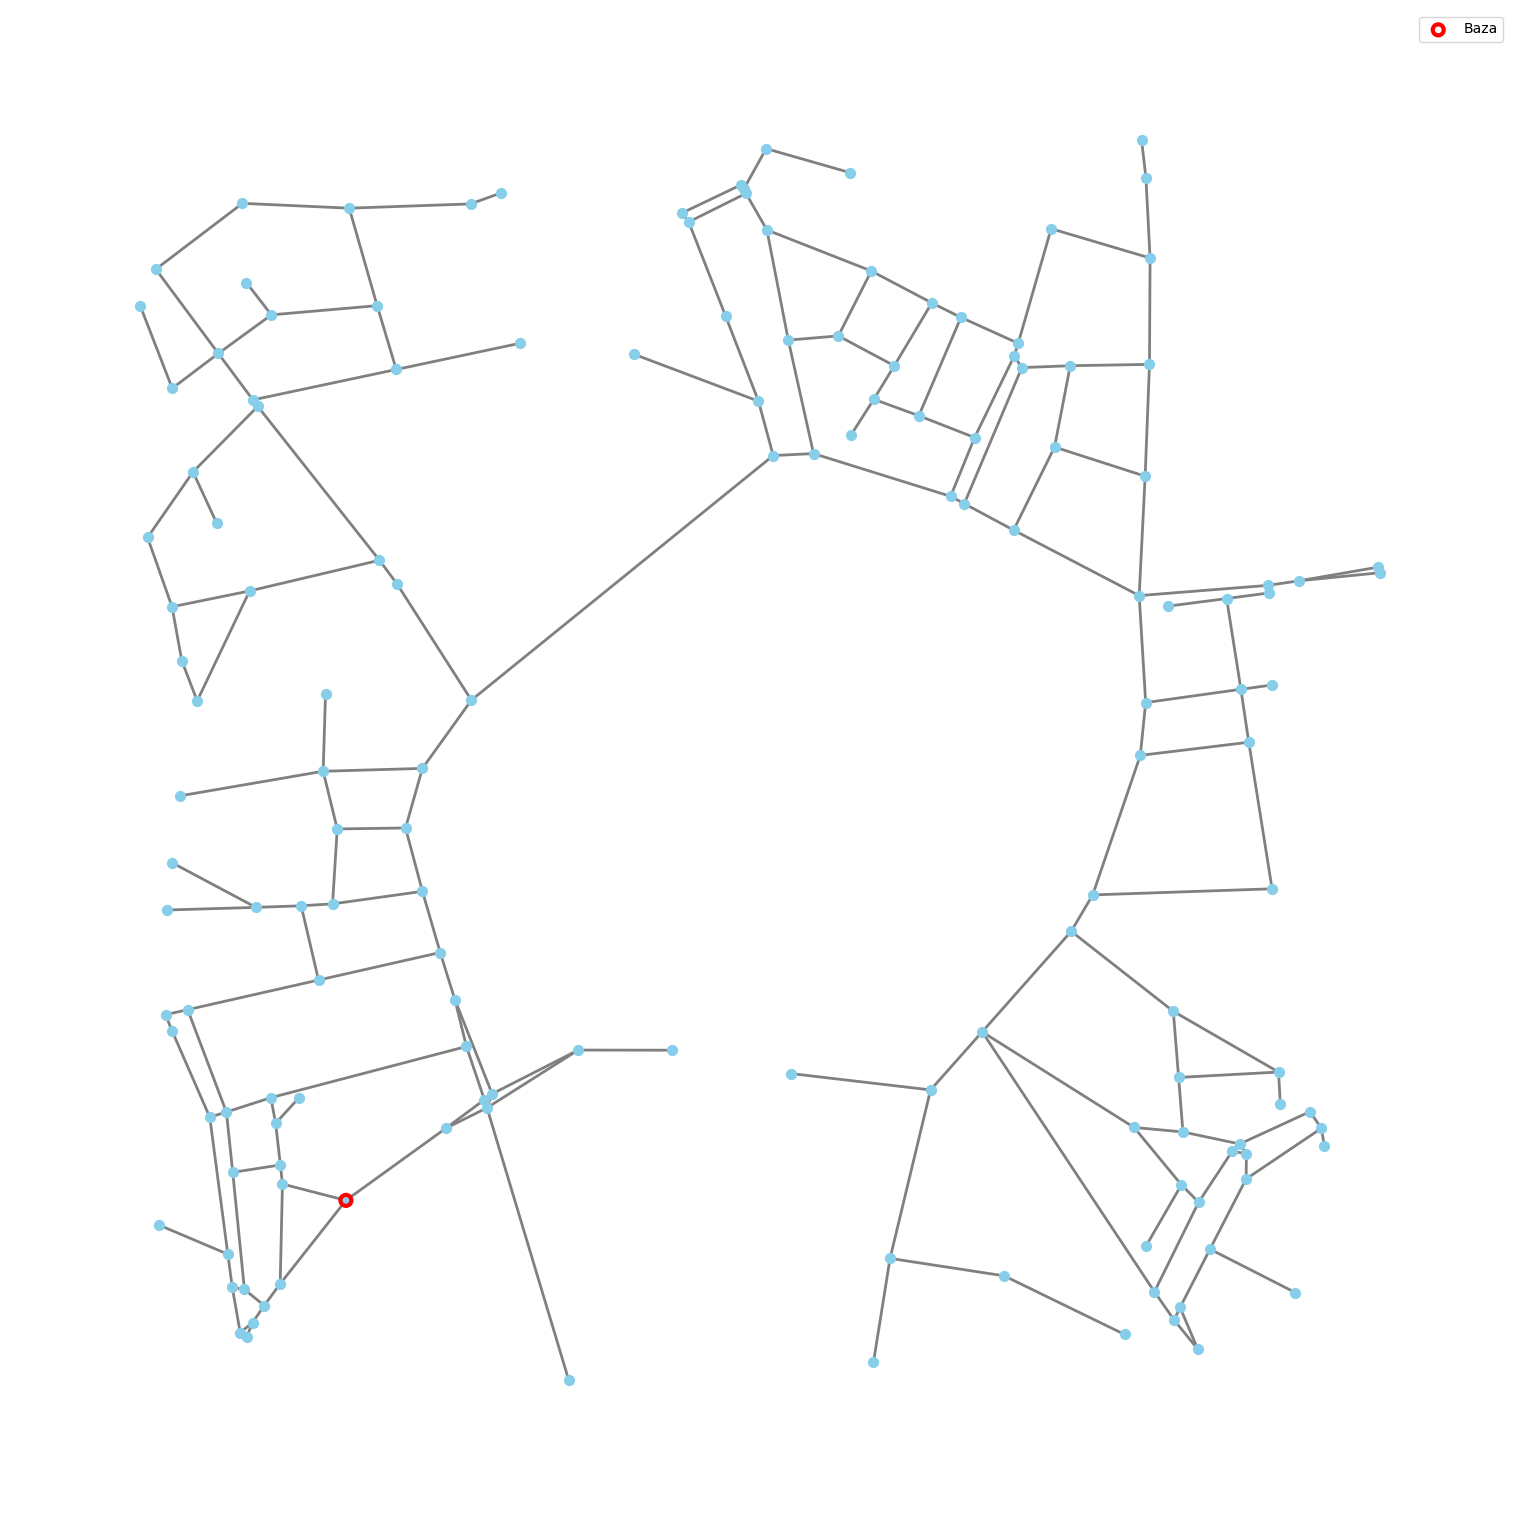

Graf glowne drogi - liczba krawędzi: 534


In [2]:
graf_glowne = pobierz_graf_osm_z_punktu(
    center_point=(50.062756, 19.938077),
    dist=800,
    dist_type="bbox",
    custom_drogi = ["tertiary", "residential"]
)
graf_glowne.rysuj(size_x=15, size_y=15, show_labels=False, show_coords=False, node_size=50, label_font_size=10, show_edge_labels=False, edge_width=2)
print("Graf glowne drogi - liczba krawędzi:", len(graf_glowne.krawedzie))

In [3]:
snowfall_forecast = [4, 8, 5, 3]

m1 = Machine(speed=50) # W km/h
m2 = Machine(speed=30)

machines = [m1, m2]

Tmax = 1 # W godzinach

problem = RoadClearingProblem(snowfall_forecast, graf_glowne, machines, Tmax)

[[(19.9307172, 50.0576389) -> (19.9295786, 50.057828), (19.9295786, 50.057828) -> (19.9295377, 50.0566752), (19.9295377, 50.0566752) -> (19.9307172, 50.0576389)], [(19.9307172, 50.0576389) -> (19.9295786, 50.057828), (19.9295786, 50.057828) -> (19.9295413, 50.0580485), (19.9295413, 50.0580485) -> (19.9286868, 50.0579629), (19.9286868, 50.0579629) -> (19.928573, 50.0586593), (19.928573, 50.0586593) -> (19.9282744, 50.0586004), (19.9282744, 50.0586004) -> (19.928599, 50.0570174), (19.928599, 50.0570174) -> (19.9286786, 50.0566336), (19.9286786, 50.0566336) -> (19.9288969, 50.0566105), (19.9288969, 50.0566105) -> (19.9292515, 50.0564249), (19.9292515, 50.0564249) -> (19.9295377, 50.0566752), (19.9295377, 50.0566752) -> (19.9295786, 50.057828), (19.9295786, 50.057828) -> (19.9295413, 50.0580485), (19.9295413, 50.0580485) -> (19.9294567, 50.0585302), (19.9294567, 50.0585302) -> (19.9293697, 50.0588249), (19.9293697, 50.0588249) -> (19.928573, 50.0586593), (19.928573, 50.0586593) -> (19.9278

3 80 36 17
16 36 36 17


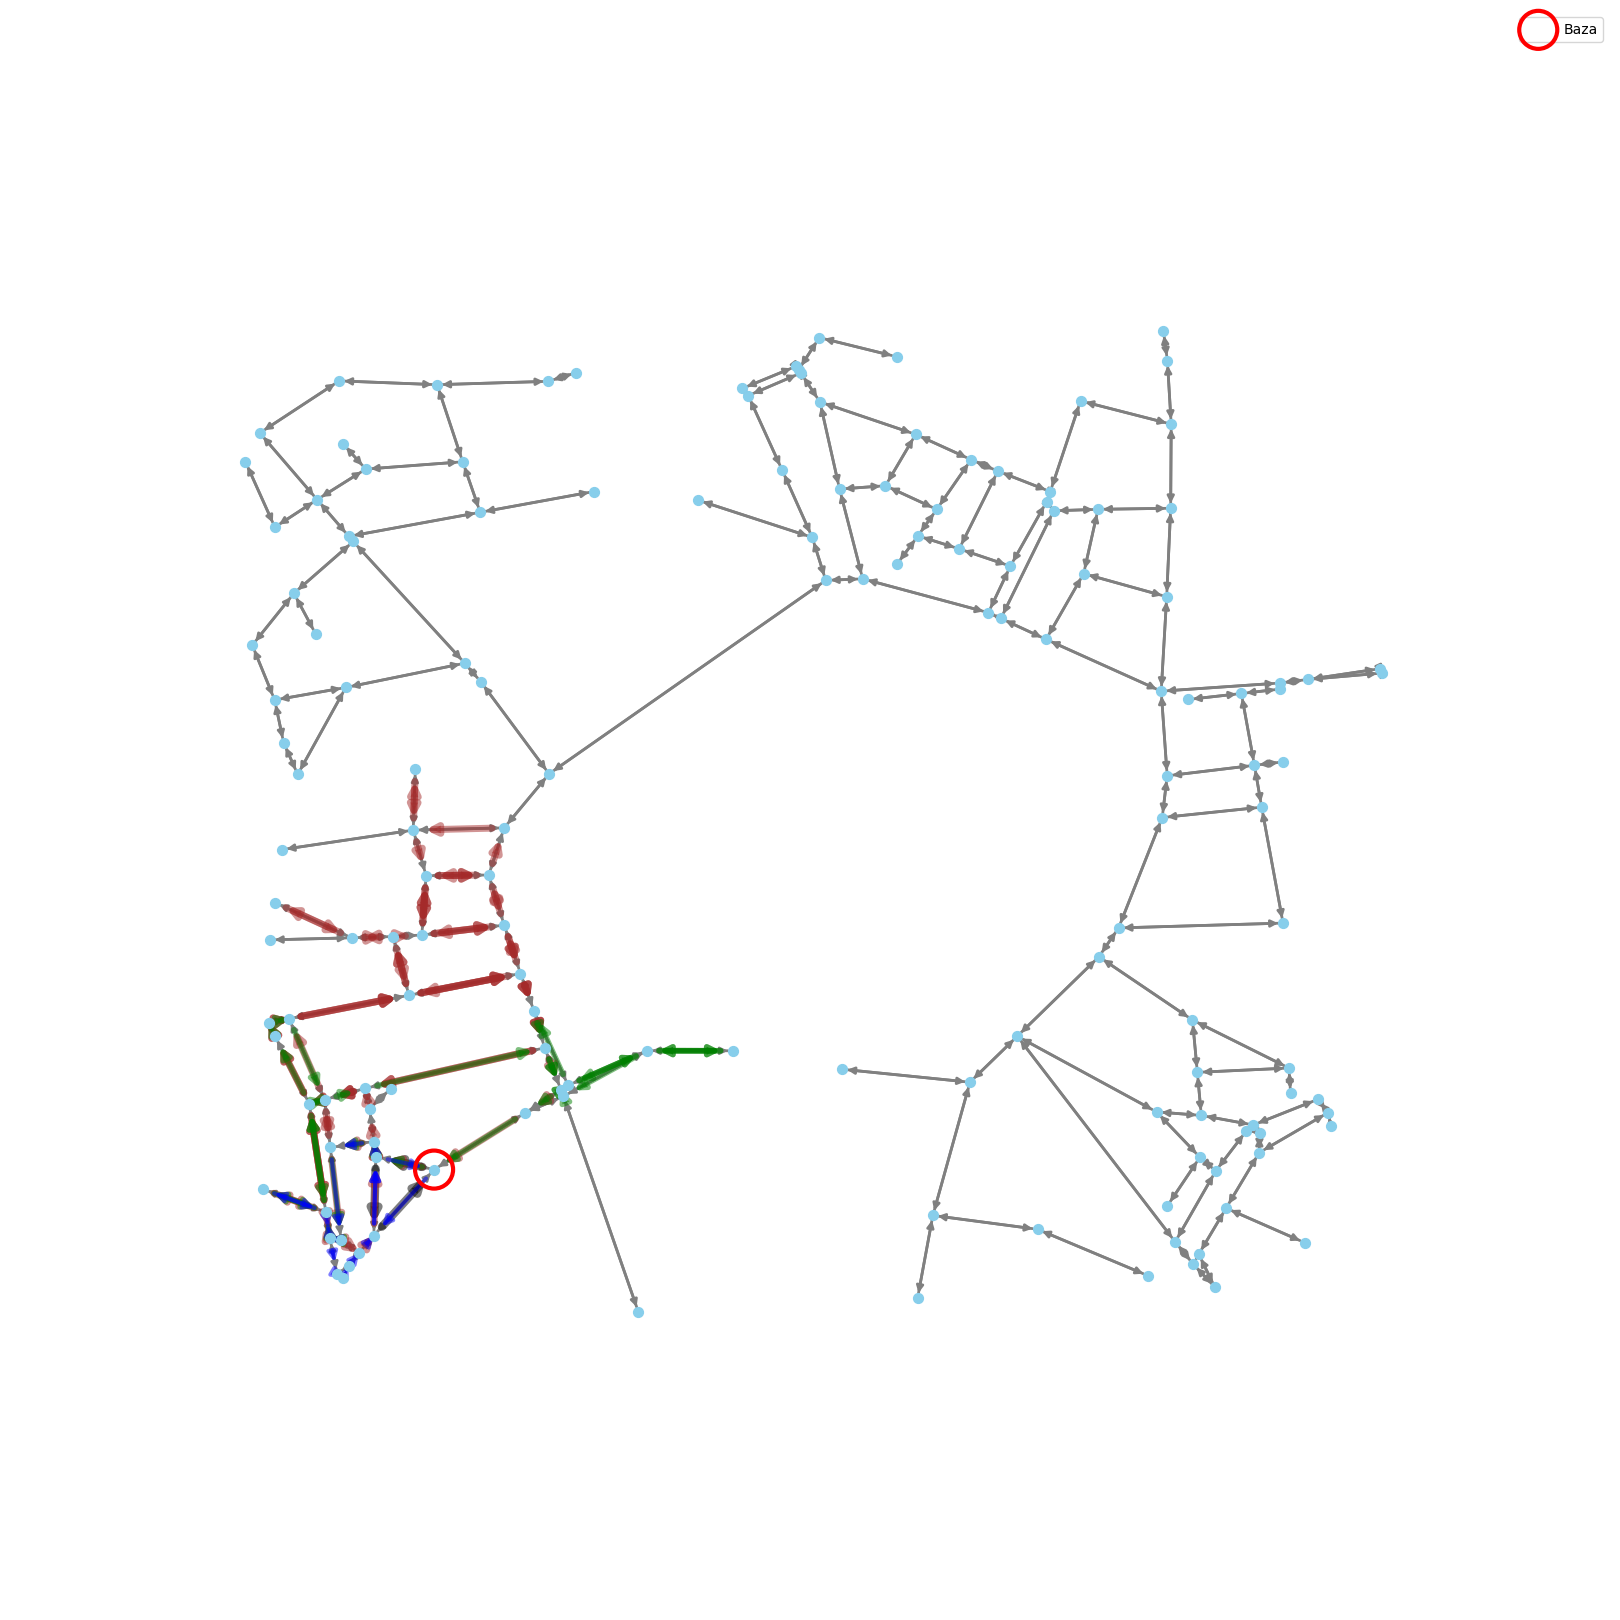

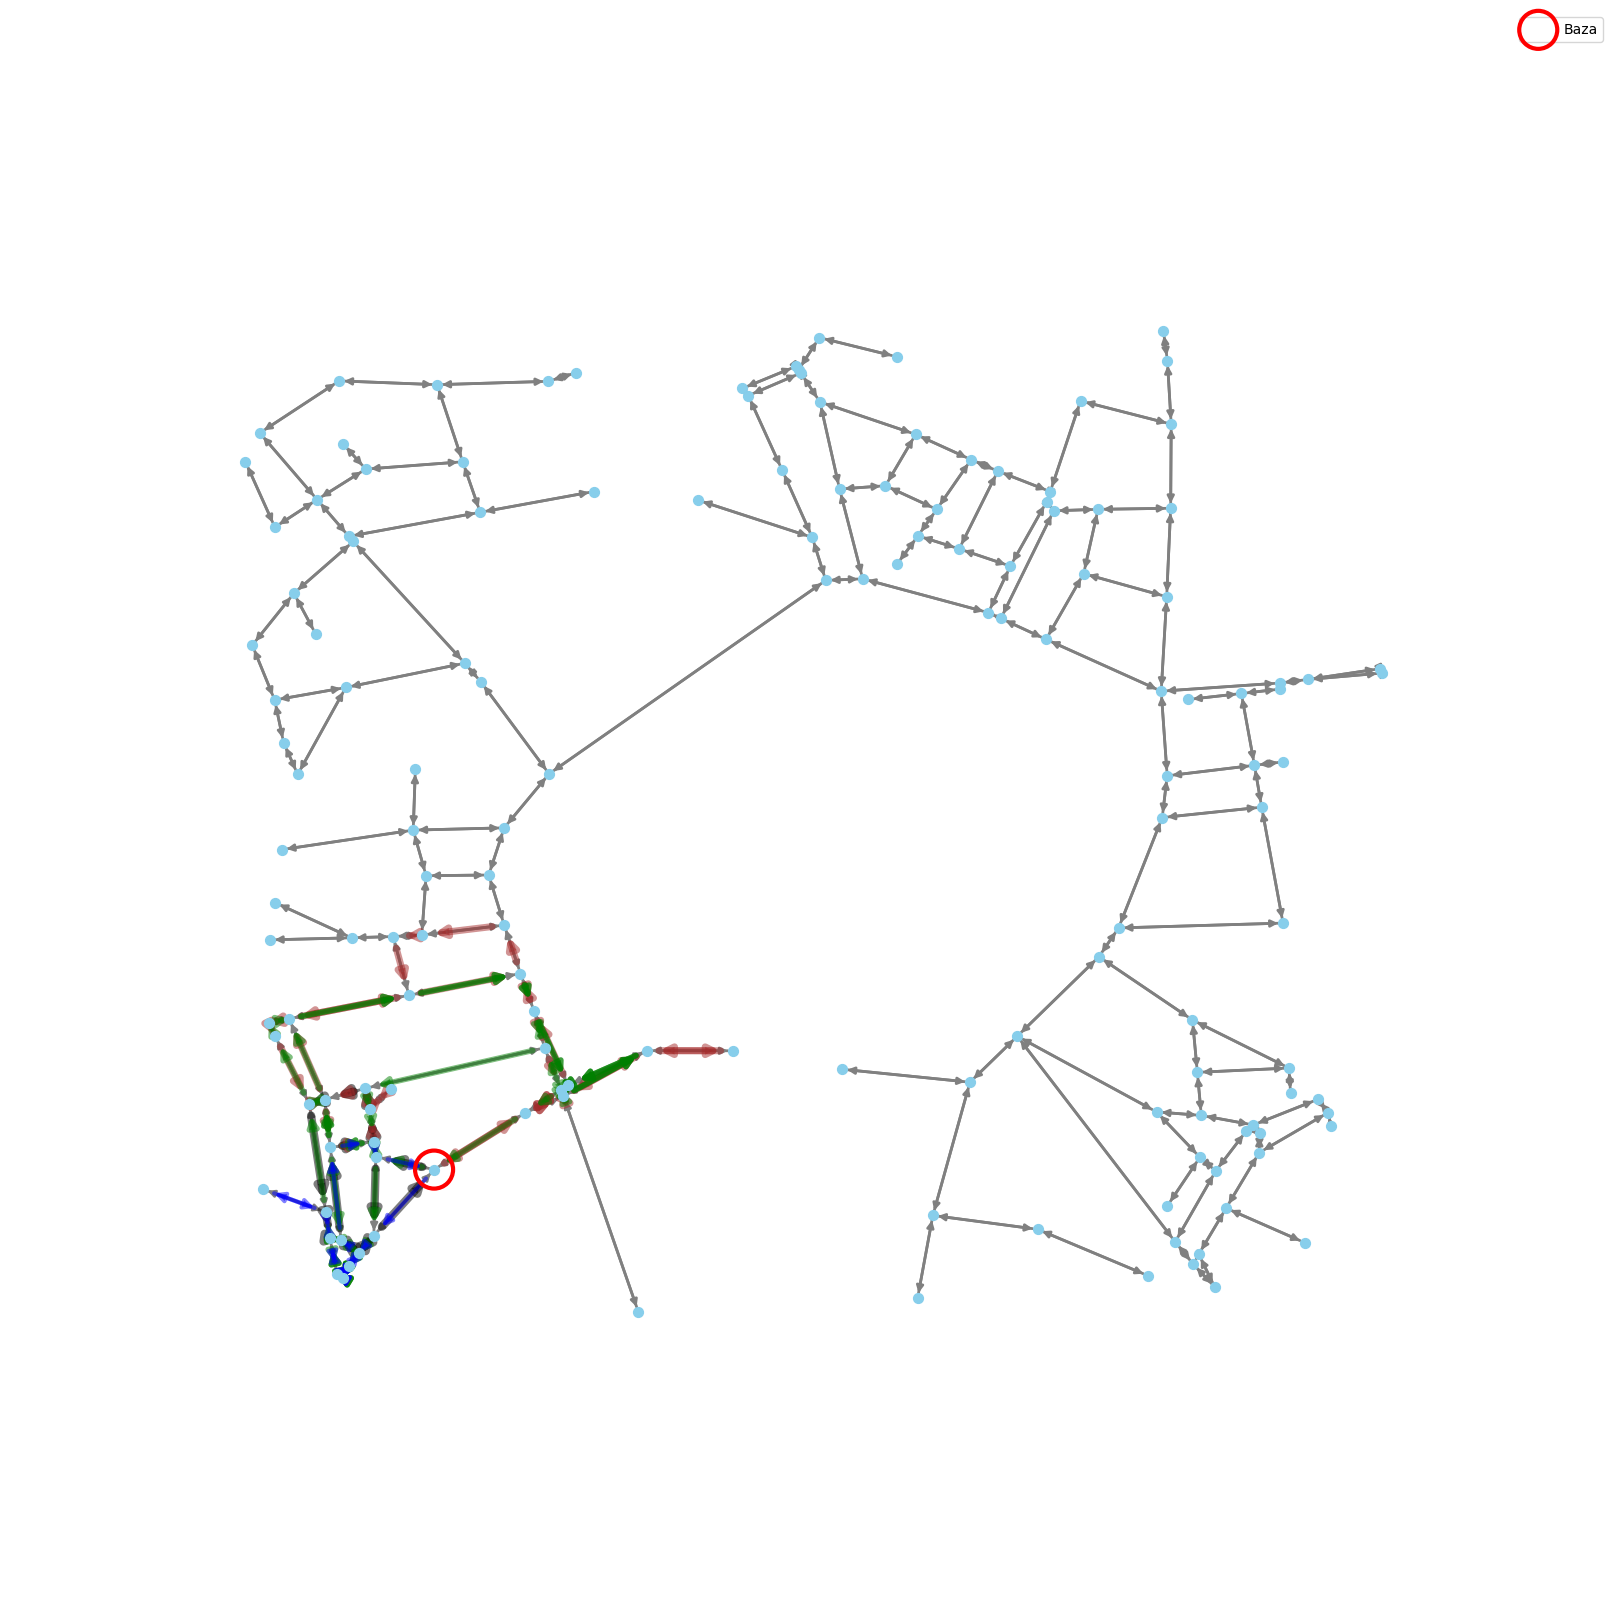

In [4]:
# Poczatkowe rozwiazania dla kazdej z maszyn
m1_poczatkowe = problem.machines[0].route
m2_poczatkowe = problem.machines[1].route

print(len(m1_poczatkowe[0]), len(m1_poczatkowe[1]), len(m1_poczatkowe[2]), len(m1_poczatkowe[3]))
print(len(m2_poczatkowe[0]), len(m2_poczatkowe[1]), len(m1_poczatkowe[2]), len(m1_poczatkowe[3]))

graf_glowne.rysuj_z_rozwiazaniem(m1_poczatkowe, size_x=16, size_y=16, show_coords=False, show_labels=False, show_edge_labels=False, node_size=50, edge_width=2)
graf_glowne.rysuj_z_rozwiazaniem(m2_poczatkowe, size_x=16, size_y=16, show_coords=False, show_labels=False, show_edge_labels=False, node_size=50, edge_width=2)

In [5]:
initial_temperature = 30
cooling_rate = 0.95
max_iterations = 1000

best_solution, best_danger = problem.simulated_annealing_2(initial_temperature, cooling_rate, max_iterations)
m1_best = best_solution[0].route
m2_best = best_solution[1].route
print("\n")
print("Najlepsze rozwiązanie:")
print(m1_best)
print(m2_best)
print("Poziom zagrożenia:", best_danger)



-----ITERACJA  0 -------
2
NEW DANGER ->  943578
Roznica zagrozenia:  -879612


-----ITERACJA  1 -------
3
[(19.930309, 50.0625945) -> (19.9320892, 50.0626276), (19.9320892, 50.0626276) -> (19.9317867, 50.0619393), (19.9317867, 50.0619393) -> (19.9305613, 50.0619286)]
[[(19.9307172, 50.0576389) -> (19.9295786, 50.057828), (19.9295786, 50.057828) -> (19.9295377, 50.0566752), (19.9295377, 50.0566752) -> (19.9307172, 50.0576389)], [(19.9307172, 50.0576389) -> (19.9295786, 50.057828), (19.9295786, 50.057828) -> (19.9295413, 50.0580485), (19.9295413, 50.0580485) -> (19.9286868, 50.0579629), (19.9286868, 50.0579629) -> (19.928573, 50.0586593), (19.928573, 50.0586593) -> (19.9282744, 50.0586004), (19.9282744, 50.0586004) -> (19.928599, 50.0570174), (19.928599, 50.0570174) -> (19.9286786, 50.0566336), (19.9286786, 50.0566336) -> (19.9288969, 50.0566105), (19.9288969, 50.0566105) -> (19.9292515, 50.0564249), (19.9292515, 50.0564249) -> (19.9295377, 50.0566752), (19.9295377, 50.0566752) -> (19

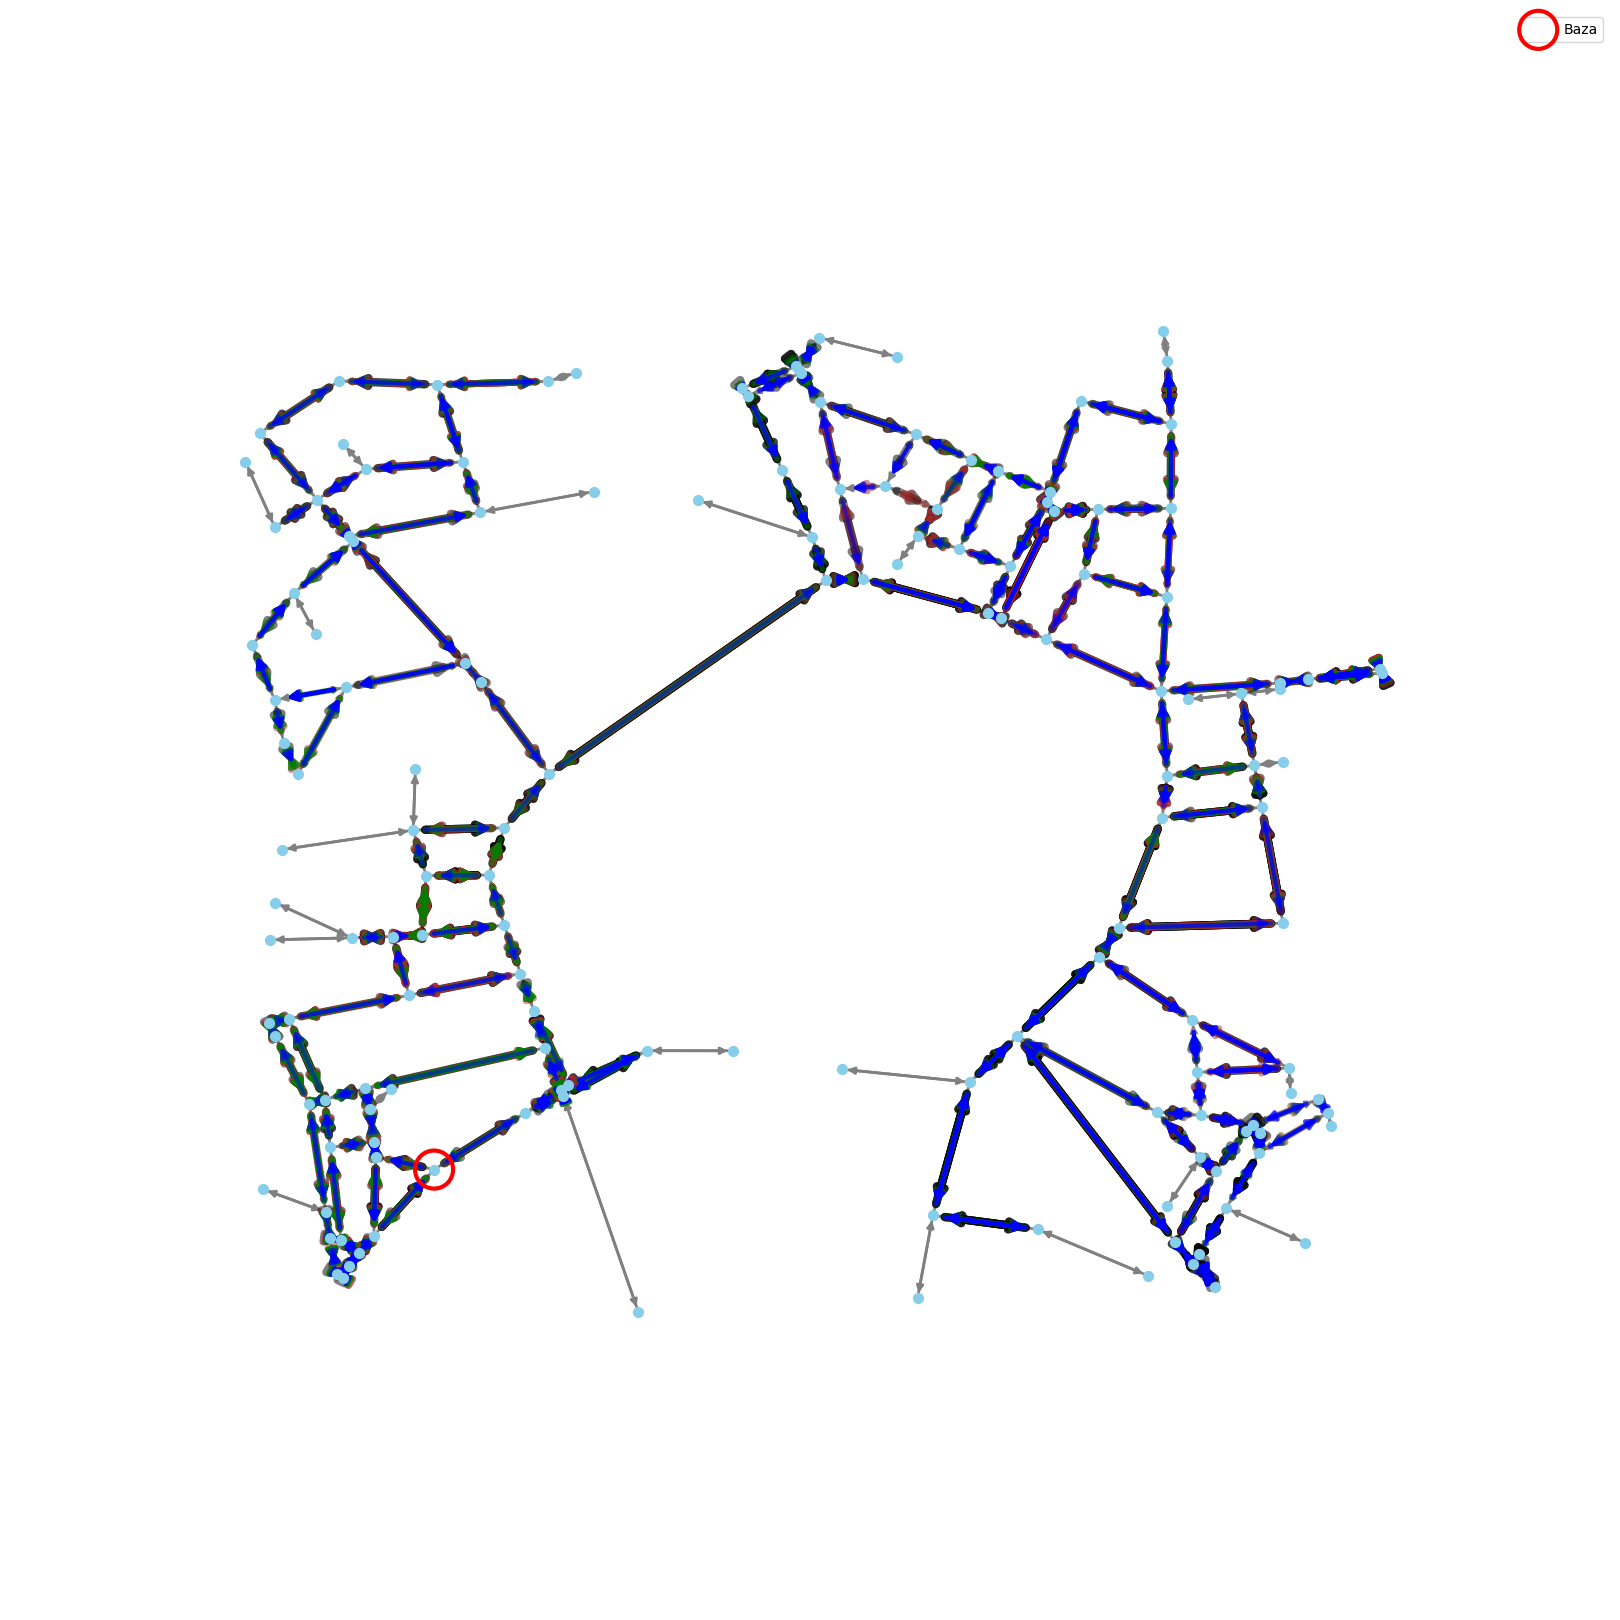

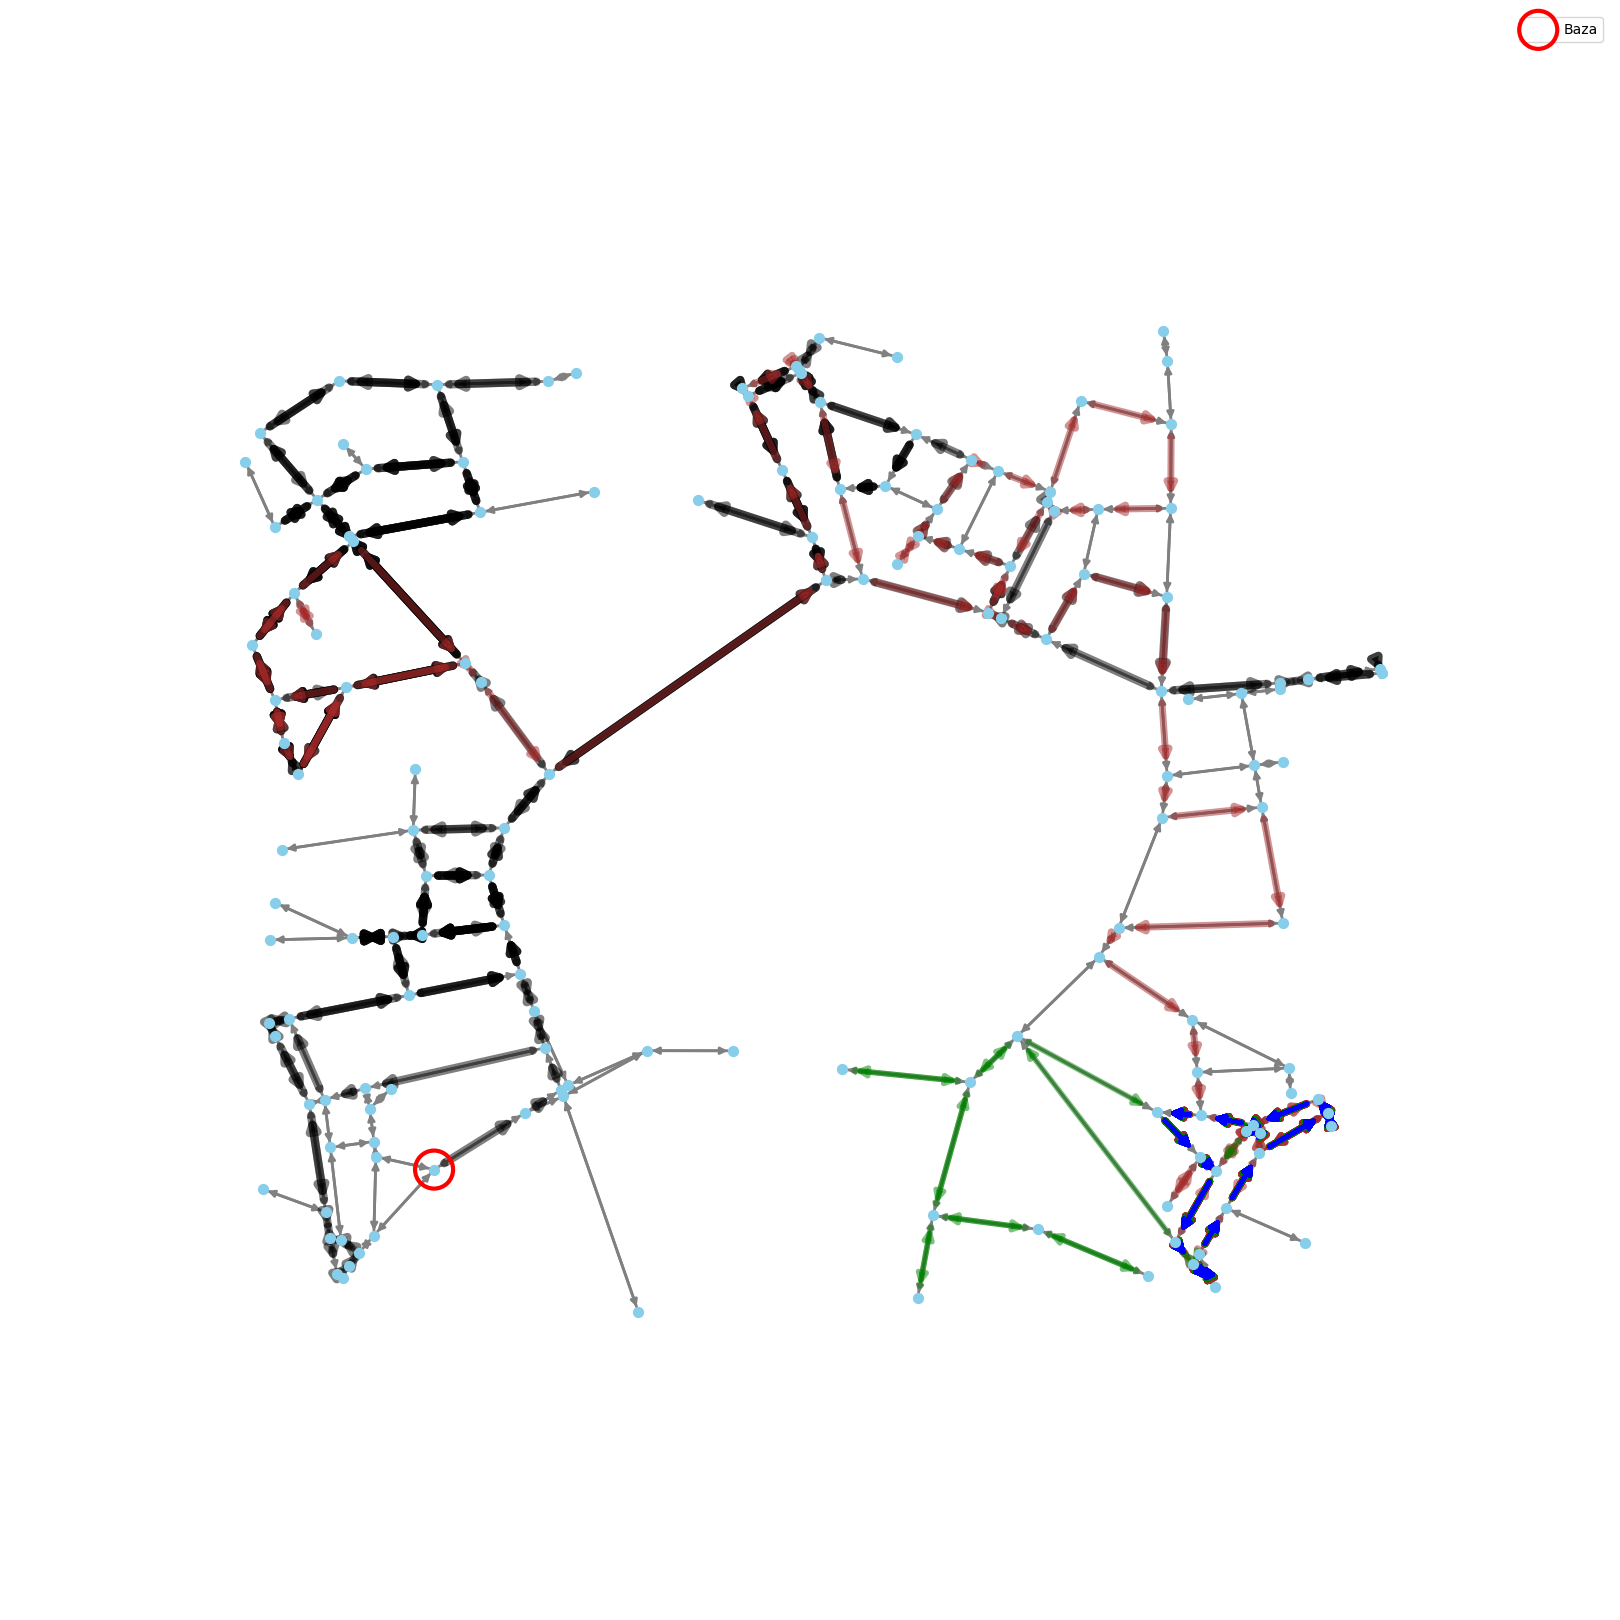

In [6]:
graf_glowne.rysuj_z_rozwiazaniem(m1_best, size_x=16, size_y=16, show_coords=False, show_labels=False, show_edge_labels=False, node_size=50, edge_width=2)
graf_glowne.rysuj_z_rozwiazaniem(m2_best, size_x=16, size_y=16, show_coords=False, show_labels=False, show_edge_labels=False, node_size=50, edge_width=2)